### DBSCAN
- Clusterização Espacial Baseada em Densidade de Aplicações com Ruído. A ideia chave do método é que, para cada ponto de um cluster, a vizinhança para um dado raio contém, no mínimo, certo número de pontos, ou seja, a densidade na vizinhança tem que exceder um limiar. Para entender o método é necessário conhecer algumas definições. 

### Clusterização Hierárquica
- O clustering hierárquico, como o nome sugere, é um algorítmo que constrói a hierarquia de clusters. Esse algoritmo começa com todos os pontos de dados atribuídos a um cluster próprio. Em seguida, os dois clusters mais próximo são mesclados no mesmo cluster. No final, esse algoritmo termina quando há apenas um único cluster.
    - https://portaldatascience.com/introducao-a-clusterizacao-e-os-diferentes-metodos/

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import haversine_distances
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import DBSCAN
from sklearn.cluster import hierarchical

from sklearn.cluster.hierarchical import pairwise_distances
from sklearn.cluster.hierarchical import AgglomerativeClustering

In [3]:
data = pd.read_csv('Cluster-Crime-Maio.gzip', compression='gzip', na_values='nulo')

In [4]:
data.head()

,ID,FONTE,FLAGRANTE,NATUREZA DA OCORRÊNCIA,HISTÓRICO DA OCORRÊNCIA,LOCAL:,BAIRRO,SUSPEITO:,VEÍCULO:,VÍTIMA:,...,ARMA APREENDIDA:,MATERIAL APREENDIDO:,PLACA:,VÍTIMAS LESIONADAS:,SUSPEITOS:,HORA,MINUTO,DATA,LATITUDE,LONGITUDE
0,1,CIOPS,NÃO,MORTE - A BALA,"LOCAL: RUA CODO, JANGURUSSU. VÍTIMA: TIAGO S.P...","RUA CODO, JANGURUSSU",JANGURUSSU,NaN,NaN,TIAGO S,...,NaN,NaN,NaN,NaN,NÃO IDENTIFICADOS,10,37,01/05/17,-3.850046,-38.522390
1,2,CIOPS,NÃO,MORTE A BALA,"LOCAL: AV. LESTE OESTE, PIRAMBU. VÍTIMA: RAFAE...","AV. LESTE OESTE, PIRAMBU",PIRAMBU,NaN,NaN,RAFAEL RS,...,NaN,NaN,NaN,NaN,NÃO IDENTIFICADOS,11,50,01/05/17,-3.712388,-38.553322
2,3,CIOPS,NÃO,MORTE A BALA,"LOCAL: RUA TAILANDIA, GENIBAÚ. VÍTIMA: ISRAEL ...","RUA TAILANDIA, GENIBAU",GENIBAU,NaN,NaN,ISRAEL RA,...,NaN,NaN,NaN,NaN,NÃO IDENTIFICADOS,13,53,01/05/17,-3.758621,-38.604318
3,4,CIOPS,NÃO,MORTE A BALA,LOCAL: RUA DR JOAQUIM FROTA SAPIRANGA COITÉ. V...,RUA DR JOAQUIM FROTA SAPIRANGA COITE,RUA DR JOAQUIM FROTA SAPIRANGA COITE,NaN,NaN,DAVI M,...,NaN,NaN,NaN,NaN,NÃO IDENTIFICADOS,15,14,01/05/17,-3.801281,-38.472957
4,5,CIOPS,NÃO,MORTE A BALA,"LOCAL: RUA CARNAUBAL, ALVARO WEYNE. VÍTIMA: DI...","RUA CARNAUBAL, ALVARO WEYNE",ALVARO WEYNE,NaN,NaN,DIEGO T,...,NaN,NaN,NaN,NaN,NÃO IDENTIFICADOS,17,42,01/05/17,-3.722553,-38.582816


In [5]:
data.isna().sum()

ID                           0
FONTE                        0
FLAGRANTE                    0
NATUREZA DA OCORRÊNCIA       0
HISTÓRICO DA OCORRÊNCIA      0
LOCAL:                       0
BAIRRO                       0
SUSPEITO:                  390
VEÍCULO:                   349
VÍTIMA:                    424
VÍTIMAS:                   558
VÍTIMA FATAL:              566
ARMA APREENDIDA:           509
MATERIAL APREENDIDO:       540
PLACA:                     523
VÍTIMAS LESIONADAS:        566
SUSPEITOS:                 432
HORA                         0
MINUTO                       0
DATA                         0
LATITUDE                     0
LONGITUDE                    0
dtype: int64

In [6]:
data.shape

(567, 22)

In [7]:
data.columns

Index(['ID', 'FONTE', 'FLAGRANTE', 'NATUREZA DA OCORRÊNCIA',
       'HISTÓRICO DA OCORRÊNCIA', 'LOCAL:', 'BAIRRO', 'SUSPEITO:', 'VEÍCULO:',
       'VÍTIMA:', 'VÍTIMAS:', 'VÍTIMA FATAL:', 'ARMA APREENDIDA:',
       'MATERIAL APREENDIDO:', 'PLACA:', 'VÍTIMAS LESIONADAS:', 'SUSPEITOS:',
       'HORA', 'MINUTO', 'DATA', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

---
Para verificarmos a quantidade de ocorrência para cada tipo, podemos observar no nosso conjunto de dados que temos a coluna <em>NATUREZA DA OCORRÊNCIA</em>, nela estão listadas todas as ocorrência de feminicídio ocorrida na cidade de <strong>Fortaleza</strong>. Para vizualizarmos a quantidade de cada tipo de ocorrência podemos executar o comando abaixo. Após a verificação, podemos perceber que o tipo MORTE A BALA tem uma maior quantidade de ocorrência.

In [18]:
data['NATUREZA DA OCORRÊNCIA'].value_counts()

VEICULO LOCALIZADO                                                          222
MORTE A BALA                                                                 97
PORTE ILEGAL DE ARMA                                                         45
TRAFICO DE ENTORPECENTES                                                     25
ROUBO A PESSOA                                                               13
PESSOA EM SITUACAO SUSPEITA                                                   6
VEICULOS LOCALIZADOS                                                          5
PORTE ILEGAL DE ARMA  (ATO INFRACIONAL)                                       4
MORTE A FACA                                                                  4
PORTE ILEGAL DE ARMA (ATO INFRACIONAL)                                        4
TRAFICO DE ENTORPECENTES (ATO INFRACIONAL)                                    4
CUMPRIMENTO DE MANDADO JUDICIAL                                               4
FURTO A RESIDENCIA                      

In [47]:
X = data[['LATITUDE', 'LONGITUDE']].values

---
Para visualizarmos de forma melhor, podemos plotar um gráfico usando a LATITUDE e LONGITUDE do local da ocorrência. Para isso usaremos a biblioteca matplotlib, que nos permite a visualização dos dados no espaço.

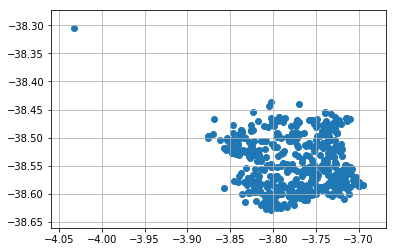

In [48]:
plt.scatter(data['LATITUDE'], data['LONGITUDE'])
plt.grid()
plt.show()

---
Para calcularmos a distância entre os pontos de ocorrência utilizaremos a <em>haversine_distances</em> que calcula a distancia angular entre dois pontos na superfície de uma esfera. A primeira distância de cada ponto é assumida como sendo a LATITUDE, a segunda é a LONGITUDE, dada em radianos. Após feito esse calculo, precisamos multiplicar por 6371 (raio da terra) para obtermos a distância em km.

In [21]:
result = haversine_distances(data[['LATITUDE', 'LONGITUDE']]) * 6371

---
Feito o cálculo, temos agora a matriz de distâncias. Utilizaremos agora o método <em>linkage</em> da biblioteca do SciPy, que recebe como entrada uma matriz de distâncias condensada e liga os pontos mais próximos no mesmo cluster. Para este exemplo usaremos o método <em>complete</em> que pega a menor distância da máxima distância entre todos os clusters.

In [32]:
hc_complete = linkage(result, method='complete')

/home/pedim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [39]:
complete = pd.DataFrame(hc_complete, columns=['idx1', 'idx2', 'dist', 'sample-count'])
complete.tail()

,idx1,idx2,dist,sample-count
561,1120.0,1127.0,8762.827353,110.0
562,1121.0,1124.0,9325.432002,230.0
563,1126.0,1129.0,11561.561329,456.0
564,1128.0,1130.0,14797.076835,566.0
565,505.0,1131.0,40749.993305,567.0


---
Para visualizarmos o dendograma dos dados, utilizaremos o método <strong><em>dendogram</em></strong> da biblioteca SciPy. Em um dendograma, começamos com todo ponto sendo seu próprio cluster, em seguida, vamos fazendo a ligação entre todos os pontos usando a distância, até ter apenas um cluster.

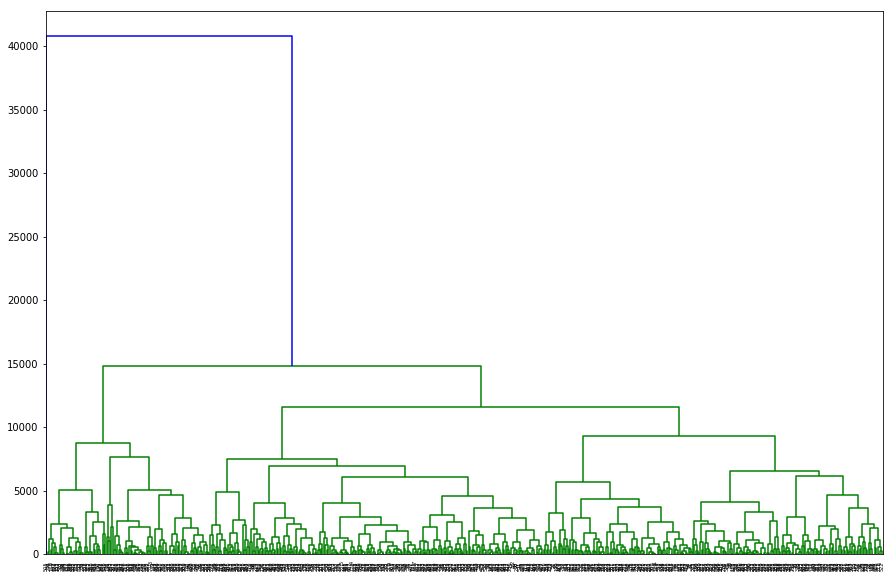

In [43]:
plt.figure(figsize=(15,10))
dendrogram(hc_complete)
plt.show()

Existem outros métodos de ligação de clusters, dentre eles temos:
- Single
- Ward

---
Temos também o algoritmo de aglomeração <strong><em>AgglomerativeClustering</em></strong> que faz o mesmo do método anterior.

In [44]:
agglomerative = AgglomerativeClustering(n_clusters=3)

In [46]:
y_pred = agglomerative.fit_predict(result)

/home/pedim/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


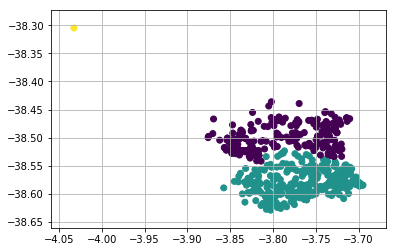

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.grid()

# DBSCAN

Por fim, usaremos o algoritmo baseado em densidade DBSCAN.

In [62]:
dbscan = DBSCAN(eps=0.01, min_samples=10, metric='haversine')

In [63]:
y_pred = dbscan.fit_predict(X)

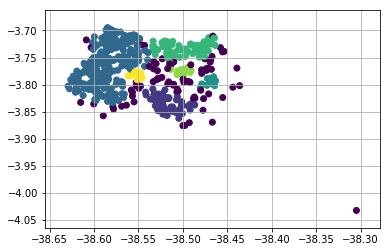

In [65]:
plt.scatter(X[:, 1], X[:, 0], c=y_pred)
plt.grid()
plt.show()